In [ ]:
 # Importing  Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


# Loading the Dataset

In [17]:
conn = sqlite3.connect('inventory.db')

df= pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,9578.0,344712.22,64889.97,17598.14,68601.68,-3466539.38,-1005.632867,0.066019,0.090446
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,9203.0,275162.97,52289.50,16909.12,144929.24,-3528878.25,-1282.468440,0.056103,0.072334
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,11189.0,288135.11,48202.30,20557.97,123780.22,-3130168.57,-1086.354443,0.059704,0.084292
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,20226.0,444810.74,43304.31,37163.76,257032.07,-2816387.20,-633.165287,0.100287,0.136395
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,11883.0,357759.17,52774.51,21833.58,257032.07,-2665446.84,-745.039419,0.086041,0.118338


# Exploratory Data Analyis:
- Previously, i examined the various tables in the database to identify key variables, understand their relationships and determine which one should be included in the final analysis.

- In this phase of EDA , i will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identidy anomalies, and ensure data quality before proceeding with further analysis.

In [18]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000e+00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,5.800000e+01,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,3.600000e-01,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,4.900000e-01,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000e+00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,7.100000e-01,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,7144.0,342.562850,1047.307202,1.000000e+00,12.000000,61.000000,270.000000,2.854400e+04
TotalSalesDollars,7144.0,4624.092104,14662.388203,1.980000e+00,249.817500,1119.230000,4053.485000,4.448107e+05
TotalSalesPrice,7144.0,2257.384103,4593.699964,9.800000e-01,125.880000,635.445000,2422.330000,6.488997e+04
TotalExciseTax,7144.0,194.596923,1031.268200,2.000000e-02,1.910000,11.825000,68.642500,3.716376e+04


In [25]:
#..Removing Null Values
df = df.dropna()

In [26]:
# summary statistics after removing null values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,7144.0,9647.829087,16321.752350,2.000000e+00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,7144.0,17291.825308,13208.121287,5.800000e+01,5097.500000,16611.000000,24495.250000,9.008900e+04
PurchasePrice,7144.0,17.715999,40.102381,3.800000e-01,6.750000,10.150000,17.850000,2.290070e+03
ActualPrice,7144.0,26.360140,54.925019,4.900000e-01,10.490000,15.990000,26.990000,2.999990e+03
TotalPurchaseQuantity,7144.0,4371.999860,13274.798822,1.000000e+00,85.000000,720.500000,3368.250000,3.376600e+05
TotalPurchaseDollars,7144.0,42357.351358,148763.087752,7.100000e-01,1122.005000,7730.645000,33678.812500,3.811252e+06
TotalSalesQuantity,7144.0,342.562850,1047.307202,1.000000e+00,12.000000,61.000000,270.000000,2.854400e+04
TotalSalesDollars,7144.0,4624.092104,14662.388203,1.980000e+00,249.817500,1119.230000,4053.485000,4.448107e+05
TotalSalesPrice,7144.0,2257.384103,4593.699964,9.800000e-01,125.880000,635.445000,2422.330000,6.488997e+04
TotalExciseTax,7144.0,194.596923,1031.268200,2.000000e-02,1.910000,11.825000,68.642500,3.716376e+04


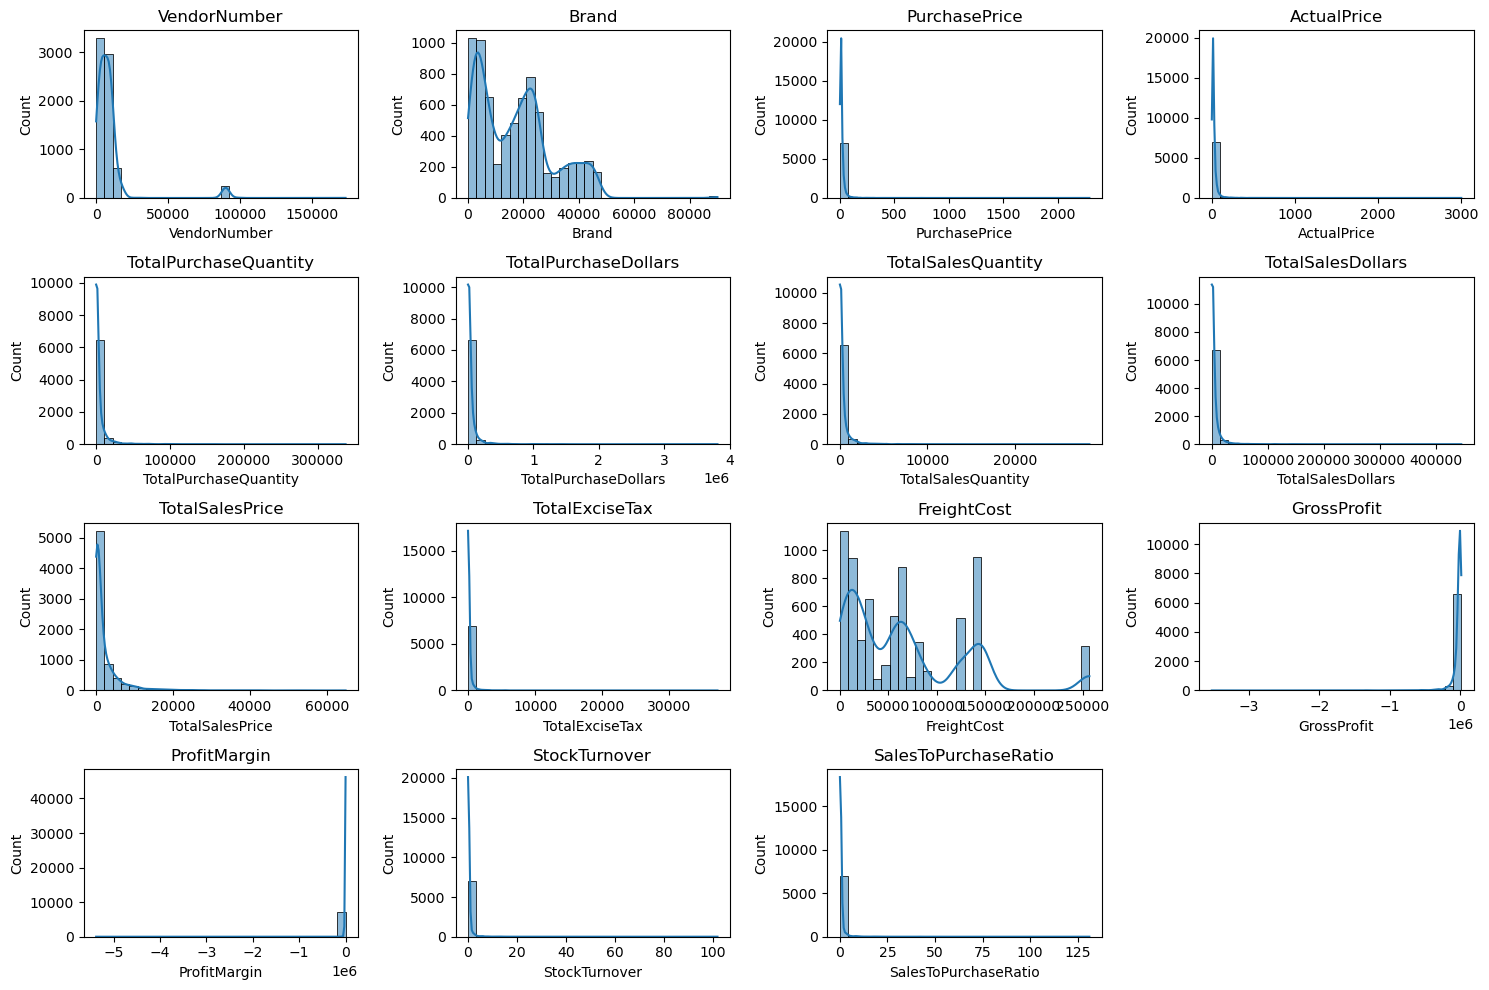

In [27]:
# Distribution Plots for Numerical columns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()
    


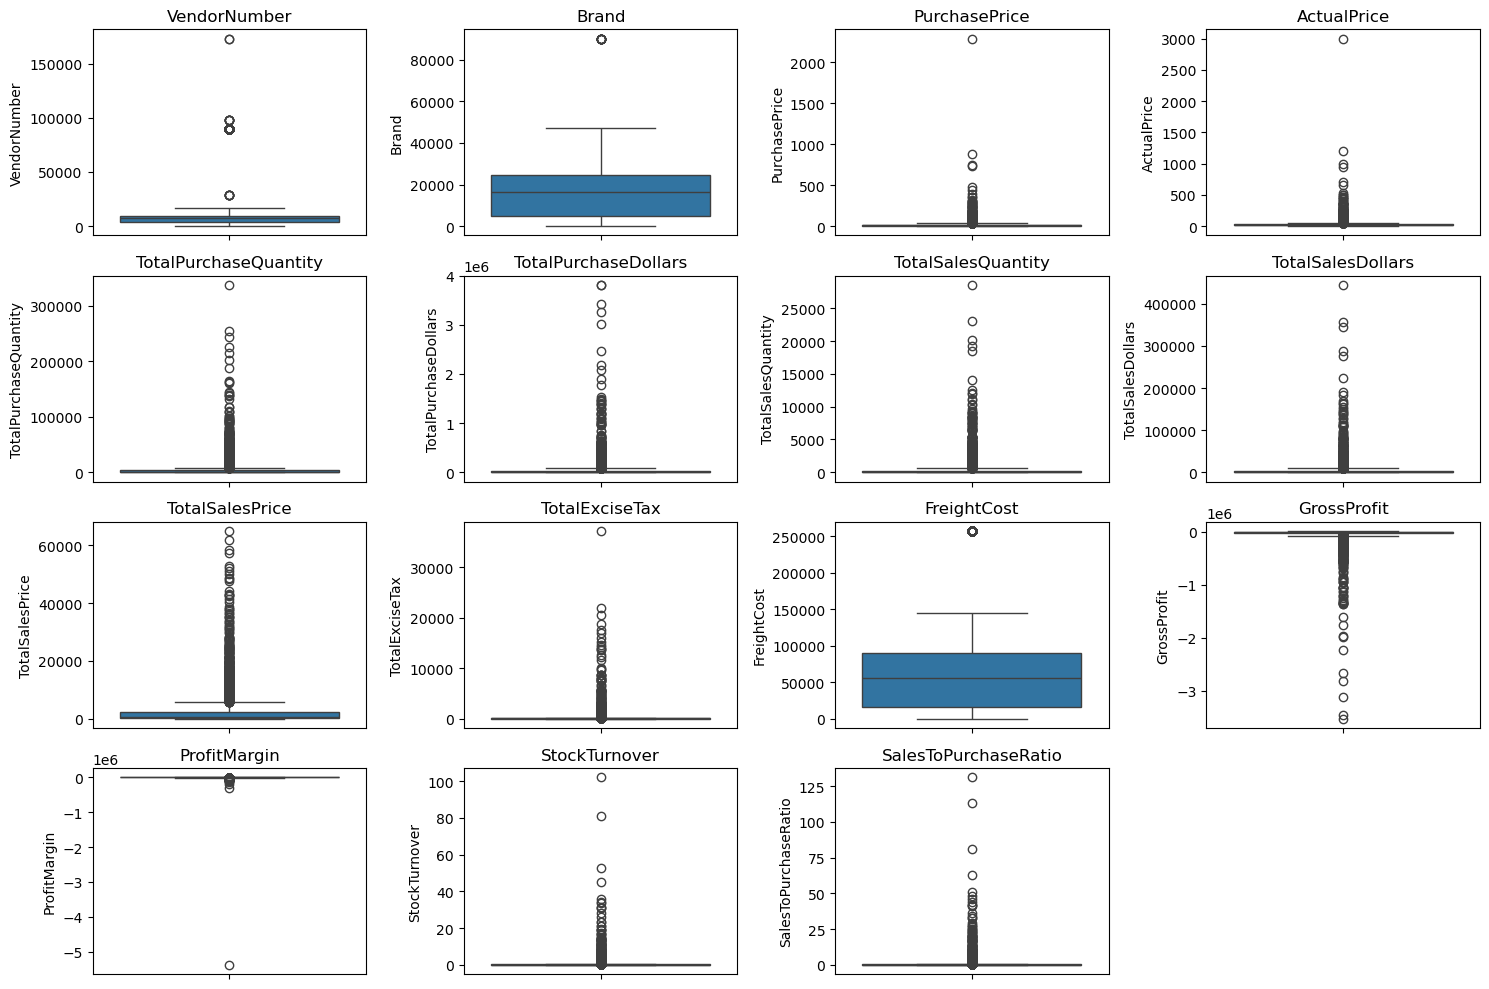

In [28]:
# Outlier Detection with Boxplot

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
    

# Summary Statistics Insights:
------------------------Negative & Zero Values:--------------------------

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling     at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or        obsolete stock.


 ------------------- Outliers Indicated by High Standard Deviations:---------------
  

- Purchase & Actual Prices: The max values are significantly higher than the mean, indicating potential premium   products.
- Freight Cost: Huge variation, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges variation implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.

In [29]:
# Let's filter the data by removing inconsistencies

df = pd.read_sql_query("""SELECT * 
           FROM vendor_sales_summary
           WHERE GrossProfit > 0
           AND ProfitMargin > 0
           AND TotalSalesQuantity > 0""", conn)

In [30]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750,250,24832.50,198.0,29698.02,1199.92,22.24,28720.52,4865.52,16.383314,0.792000,1.195934
1,9552,M S WALKER INC,23355,Paul Dolan 12 Cab Svgn,9.60,14.49,750,1486,14265.60,1151.0,17253.49,5381.41,128.82,55551.82,2987.89,17.317598,0.774563,1.209447
2,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750,846,12529.26,867.0,17331.33,7196.40,683.00,89286.27,4802.07,27.707452,1.024823,1.383268
3,9165,ULTRA BEVERAGE COMPANY LLP,24379,Madison's Ranch Cab Svgn,8.78,12.99,750,1359,11932.02,1909.0,24797.91,6105.30,214.06,68054.70,12865.89,51.882961,1.404709,2.078266
4,9552,M S WALKER INC,45604,Latour 12 Cuvee Bourg Rouge,13.07,19.99,750,830,10848.10,614.0,12273.86,5037.48,68.49,55551.82,1425.76,11.616232,0.739759,1.131429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50,2,2.84,12.0,23.88,1.99,0.63,257032.07,21.04,88.107203,6.000000,8.408451
677,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
678,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
679,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,6.0,11.94,7.96,1.26,257032.07,10.47,87.688442,6.000000,8.122449


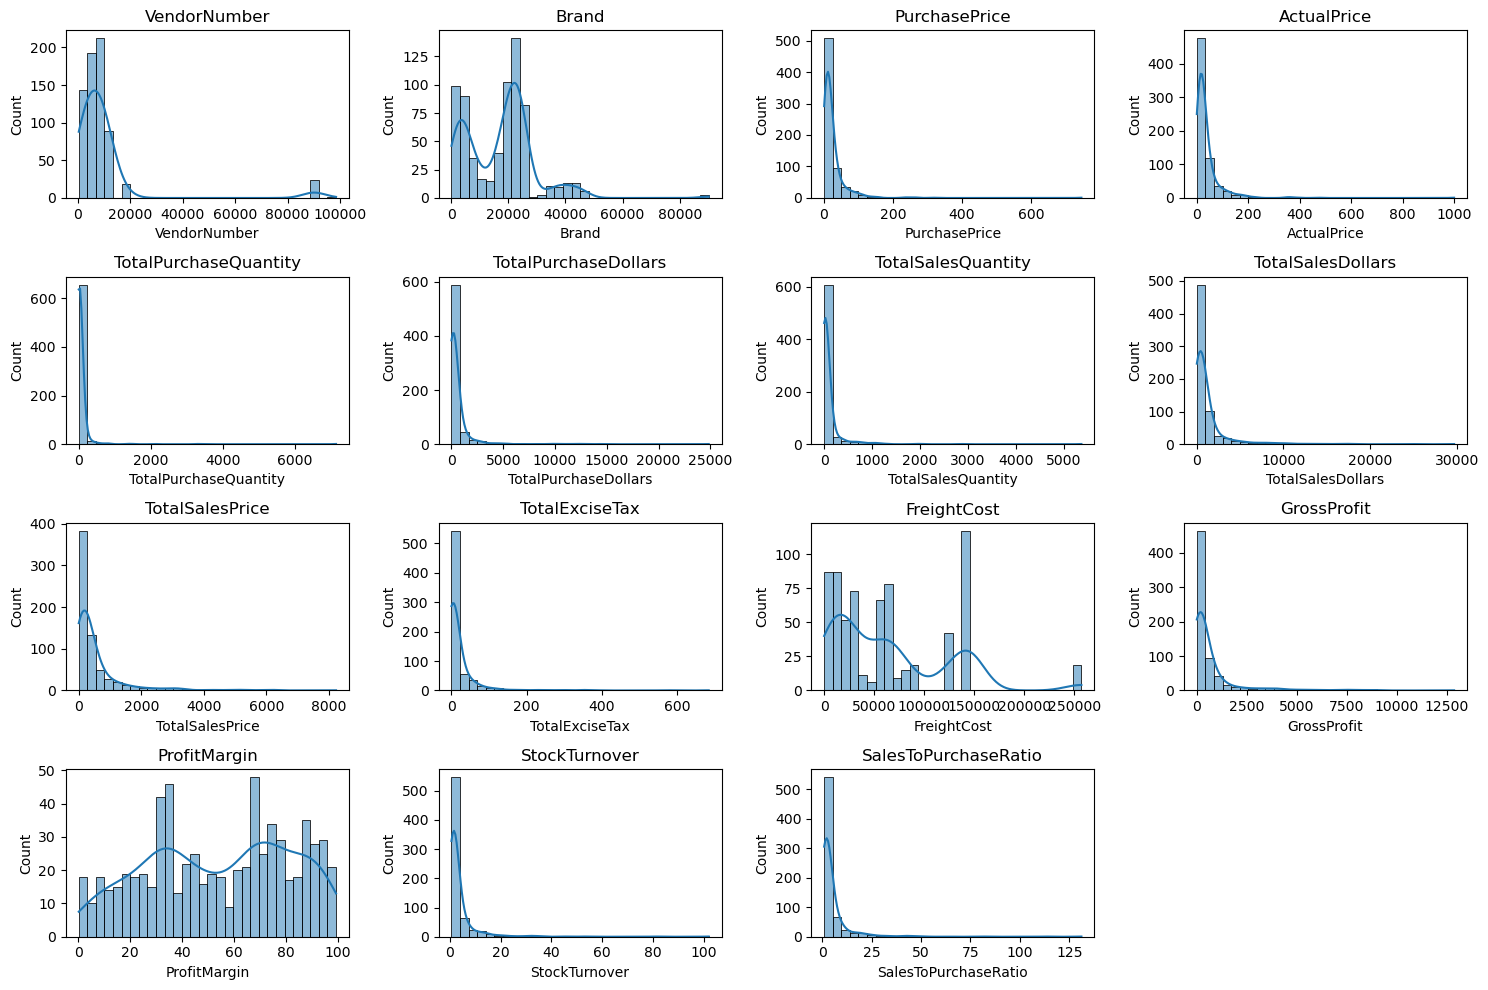

In [31]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()

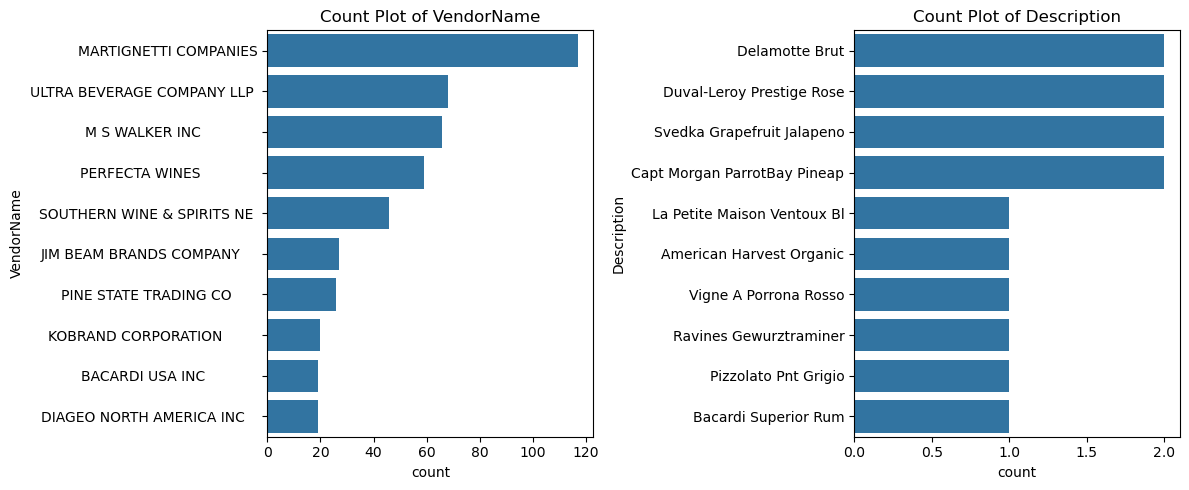

In [33]:
# Count Plots for categorial columns

categorial_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorial_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()
    
    

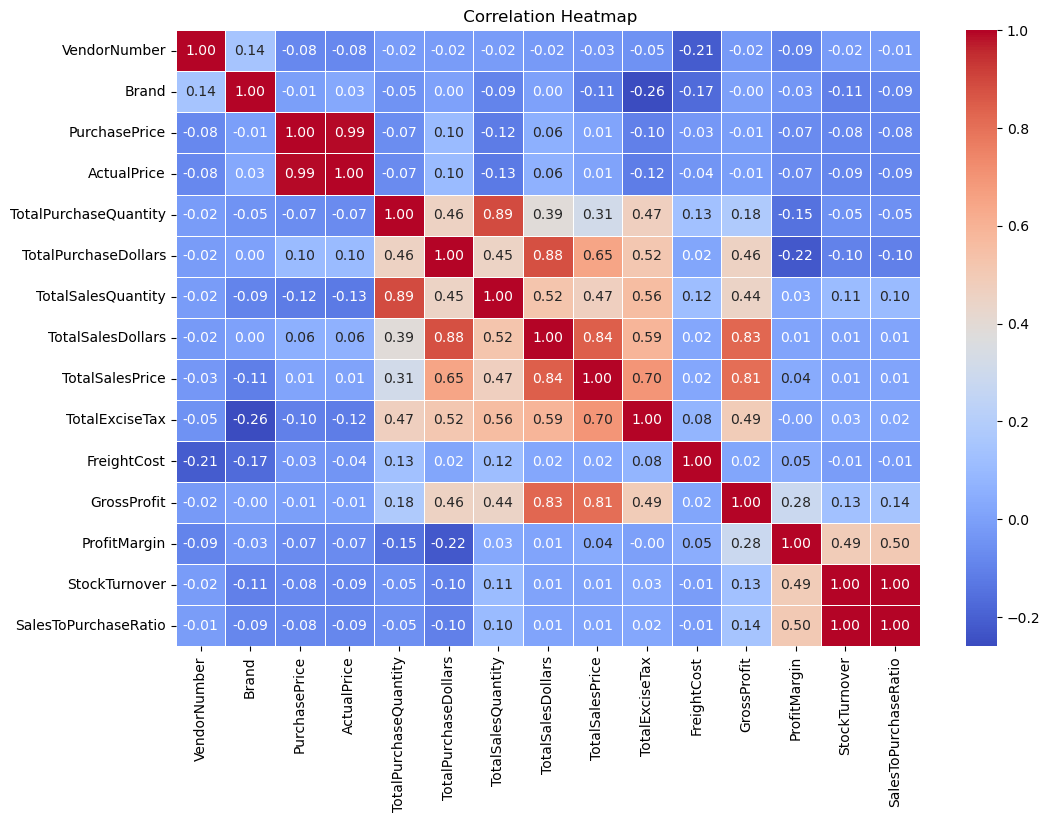

In [34]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, fmt= ".2f", cmap= "coolwarm", linewidths= 0.5)
plt.title(" Correlation Heatmap")
plt.show()

# Data Analysis  :-----

#### 1. Identidy Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margin

In [39]:
 brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin':'mean'}).reset_index()

In [40]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [41]:
low_sales_threshold

np.float64(119.832)

In [42]:
high_margin_threshold 

np.float64(87.42082785501476)

In [44]:
# Filter brands with low sales but high profit margins

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]

print("Brands with Low Sales but High Profit Margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
616,The Club Strawbry Margarita,11.94,87.688442
229,Crown Royal Apple,23.88,88.107203
635,Tracia Syrah,44.94,88.495772
46,Bacardi Oakheart Spiced Trav,59.94,87.554221
256,Dr McGillicuddy's Apple Pie,62.72,96.269133
579,St Elder Elderflower Liqueur,66.33,91.436756
31,Aresti Pnt Nr Curico Vly,74.85,95.617902
239,DeKuyper Buttershots Trav,76.93,90.718835
626,Three Olives Grape Vodka,80.19,99.114603
580,St Germain Liqueur,89.94,87.658439


In [47]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<1000]

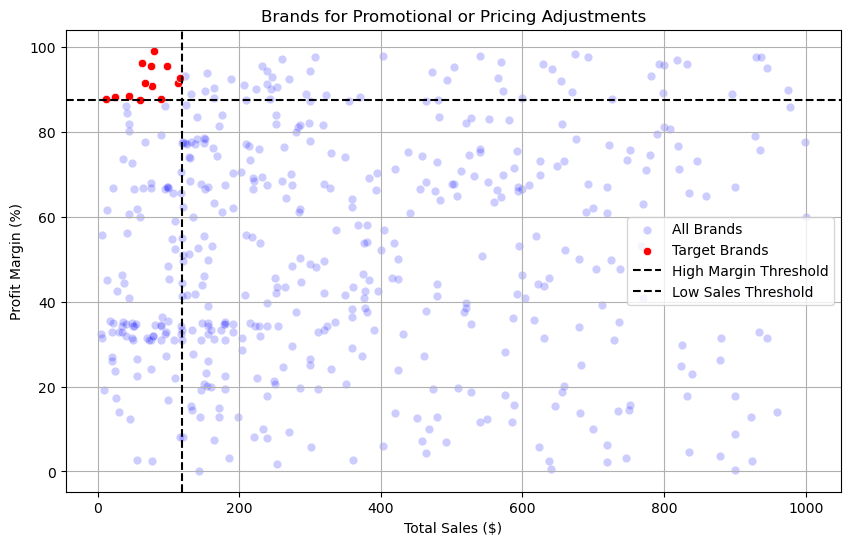

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### 2.Which vendors and brands demonstrate the highest sales performance.

In [56]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value/1_00_000: .2f}M"
    elif value >= 1_000:
        return F"{value/1_000: .2f}K"
    else: 
        return str(value)
        

In [57]:
# Top vendors and brands by sales performance

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [58]:
top_vendors

VendorName
ULTRA BEVERAGE COMPANY LLP     132226.54
MARTIGNETTI COMPANIES          125884.74
M S WALKER INC                 100939.71
PERFECTA WINES                  62686.86
BACARDI USA INC                 49095.12
SOUTHERN WINE & SPIRITS NE      48248.55
STATE WINE & SPIRITS            30773.64
JIM BEAM BRANDS COMPANY         28761.34
DIAGEO NORTH AMERICA INC        22506.09
BROWN-FORMAN CORP               20504.19
Name: TotalSalesDollars, dtype: float64

In [59]:
top_brands

Description
Ch La Rousseliere St Estephe    29698.02
Madison's Ranch Cab Svgn        24797.91
Bacardi Twin Pack 2/750mls      17331.33
Paul Dolan 12 Cab Svgn          17253.49
DiSaronna Amaretto Sour VAP     15596.83
Pizzolato Pnt Grigio            14252.61
Robert Hall Cab Svgn            12912.77
Latour 12 Cuvee Bourg Rouge     12273.86
Bacardi Superior Rum            11411.40
Saddleback Clrs 09 Cab Svgn     10447.25
Name: TotalSalesDollars, dtype: float64

In [60]:
top_vendors.apply (lambda x : format_dollars(x))

VendorName
ULTRA BEVERAGE COMPANY LLP       1.32M
MARTIGNETTI COMPANIES            1.26M
M S WALKER INC                   1.01M
PERFECTA WINES                  62.69K
BACARDI USA INC                 49.10K
SOUTHERN WINE & SPIRITS NE      48.25K
STATE WINE & SPIRITS            30.77K
JIM BEAM BRANDS COMPANY         28.76K
DIAGEO NORTH AMERICA INC        22.51K
BROWN-FORMAN CORP               20.50K
Name: TotalSalesDollars, dtype: object

In [61]:
top_brands.apply (lambda x : format_dollars(x))

Description
Ch La Rousseliere St Estephe     29.70K
Madison's Ranch Cab Svgn         24.80K
Bacardi Twin Pack 2/750mls       17.33K
Paul Dolan 12 Cab Svgn           17.25K
DiSaronna Amaretto Sour VAP      15.60K
Pizzolato Pnt Grigio             14.25K
Robert Hall Cab Svgn             12.91K
Latour 12 Cuvee Bourg Rouge      12.27K
Bacardi Superior Rum             11.41K
Saddleback Clrs 09 Cab Svgn      10.45K
Name: TotalSalesDollars, dtype: object

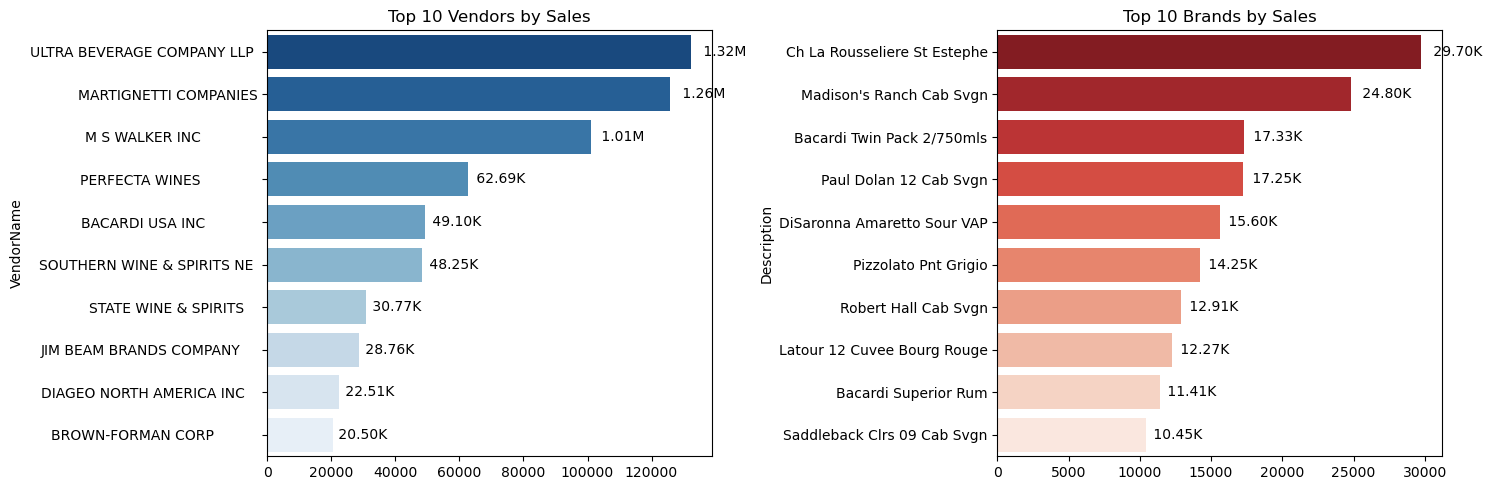

In [62]:
plt.figure(figsize=(15,5))

#Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### 3.  Which vendors contribute the most to total purchase dollars ?

In [73]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()

In [93]:
vendor_performance['PurchaseContribution%']= vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [94]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending= False),2)

In [95]:
# Display Top 10 Vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
56,ULTRA BEVERAGE COMPANY LLP,51.49K,80.73K,1.32M,13.54
30,MARTIGNETTI COMPANIES,49.36K,76.53K,1.26M,12.97
28,M S WALKER INC,48.47K,52.47K,1.01M,12.74
37,PERFECTA WINES,40.43K,22.26K,62.69K,10.63
2,BACARDI USA INC,28.83K,20.27K,49.10K,7.58
47,SOUTHERN WINE & SPIRITS NE,20.94K,27.30K,48.25K,5.51
24,JIM BEAM BRANDS COMPANY,14.29K,14.47K,28.76K,3.76
13,DIAGEO NORTH AMERICA INC,14.02K,8.49K,22.51K,3.69
48,STATE WINE & SPIRITS,11.70K,19.07K,30.77K,3.08
38,PERNOD RICARD USA,10.76K,9.57K,20.33K,2.83


In [96]:
top_vendors['Cumulative_Contribution%']= top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
56,ULTRA BEVERAGE COMPANY LLP,51.49K,80.73K,1.32M,13.54,13.54
30,MARTIGNETTI COMPANIES,49.36K,76.53K,1.26M,12.97,26.51
28,M S WALKER INC,48.47K,52.47K,1.01M,12.74,39.25
37,PERFECTA WINES,40.43K,22.26K,62.69K,10.63,49.88
2,BACARDI USA INC,28.83K,20.27K,49.10K,7.58,57.46
47,SOUTHERN WINE & SPIRITS NE,20.94K,27.30K,48.25K,5.51,62.97
24,JIM BEAM BRANDS COMPANY,14.29K,14.47K,28.76K,3.76,66.73
13,DIAGEO NORTH AMERICA INC,14.02K,8.49K,22.51K,3.69,70.42
48,STATE WINE & SPIRITS,11.70K,19.07K,30.77K,3.08,73.50
38,PERNOD RICARD USA,10.76K,9.57K,20.33K,2.83,76.33


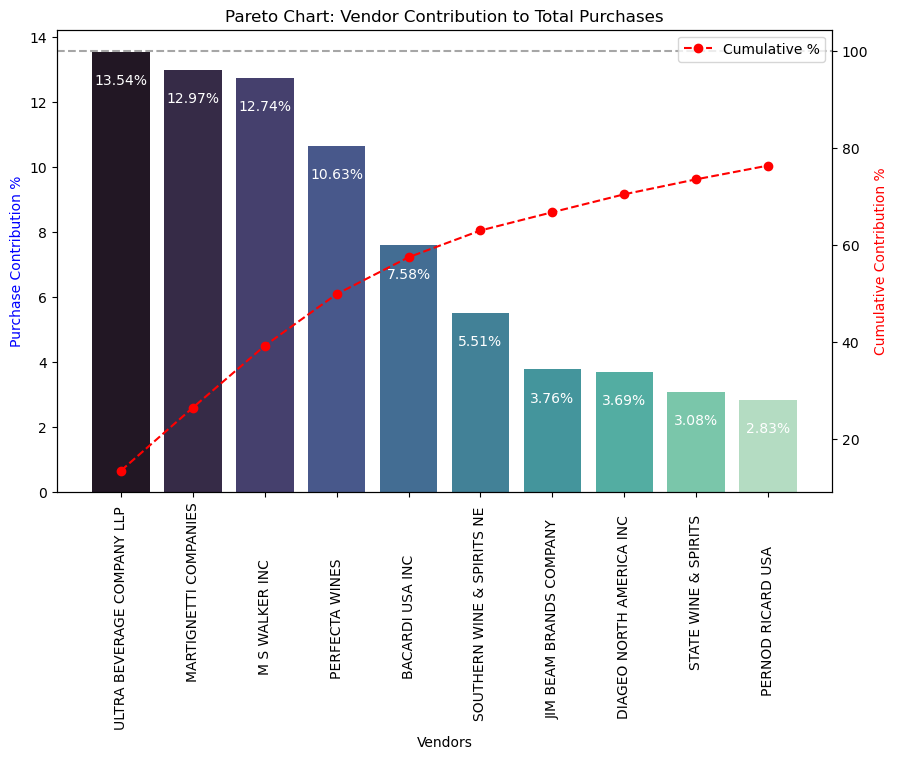

In [100]:
fig, ax1 = plt.subplots(figsize=(10,6))

#Bar plot for Purchase Contribution
sns.barplot(x=top_vendors ['VendorName'], y=top_vendors ['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors ['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

#Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors ['VendorName'], top_vendors ['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels (top_vendors ['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2. legend (loc='upper right')

plt.show()

#### 4. How much of total procurement is dependent on the top vendors?

In [104]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 76.33 %


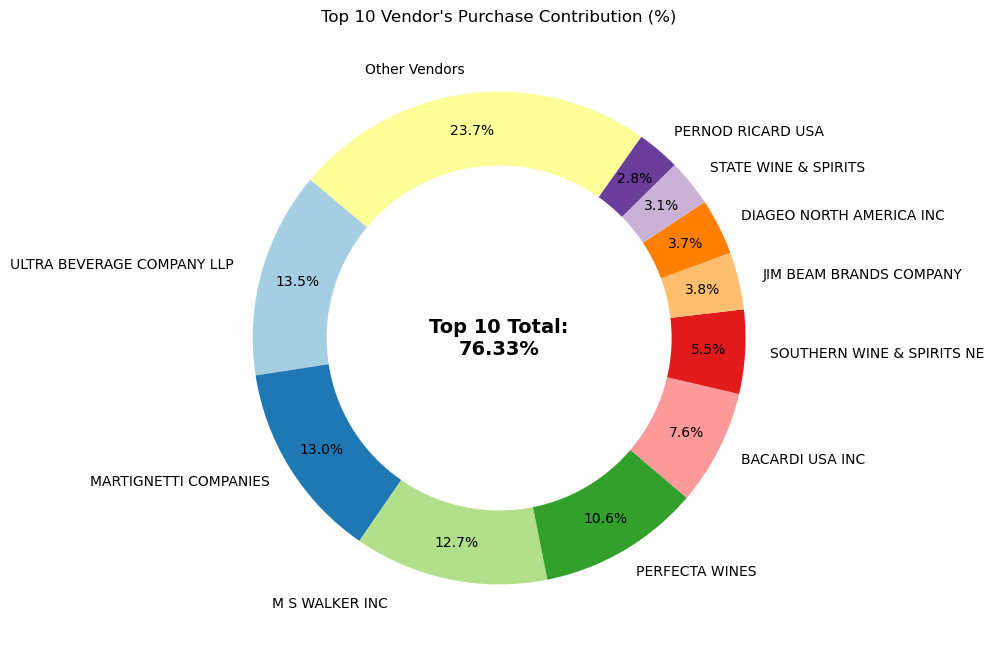

In [105]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions) 
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax= plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie (purchase_contributions, labels = vendors, autopct='%1.1f%%',
                                   startangle=140, pctdistance=0.85, colors= plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle ((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### 5. Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?

In [ ]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']


In [114]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small","Medium","Large"])

In [115]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,36.700159
Medium,22.570569
Large,11.932248


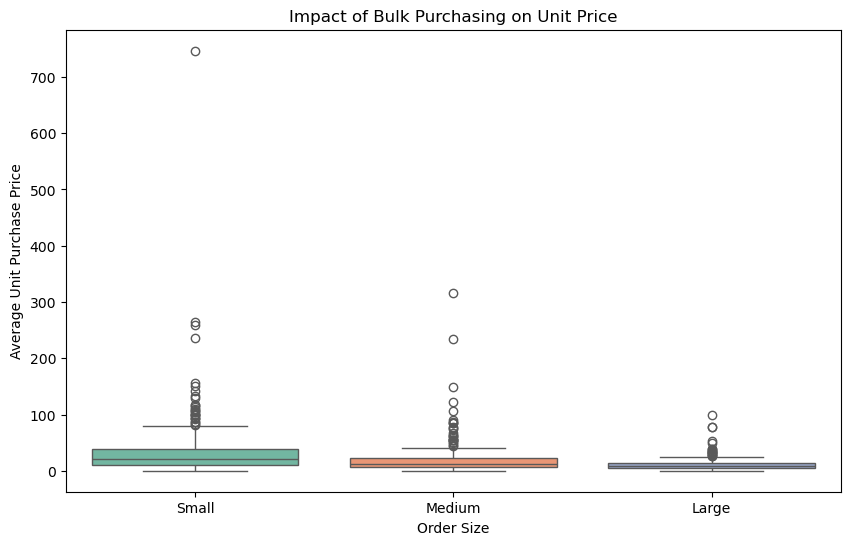

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

##### conclusion from avove graph------

- Vendors buying in bulk(Large Order Size) get the lowest unit price($11.93 per unit), meaning higher margins if they 
  can manage inventory efficiently.
- The price difference between small and large orders is substantial(~ 68% reduction in unit cost).
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumns, leading to
  higher overall sales despite lower per-unit revenue.
...................................................................................................................................................  

#### 6. Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [120]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending= True).head(10)

,StockTurnover
VendorName,
BANFI PRODUCTS CORP,0.650000
HEAVEN HILL DISTILLERIES,0.660000
SURVILLE ENTERPRISES CORP,0.666667
WILLIAM GRANT & SONS INC,0.695652
STATE WINE & SPIRITS,0.707093
VINEXTRA INC,0.716981
SOUTHERN WINE & SPIRITS NE,0.729167
TREASURY WINE ESTATES,0.745798
E & J GALLO WINERY,0.746296


#### 7. How much capital is locked in unsold inventory perr vendor and which vendors contribute the most to it?

In [122]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"])* df["PurchasePrice"]
print('Total Unsold Capital : ', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital :  -192691.53


In [124]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName") ["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor ['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
54,TREASURY WINE ESTATES,339.94
51,SURVILLE ENTERPRISES CORP,240.72
3,BANFI PRODUCTS CORP,205.41000000000003
35,NICHE W & S,202.94
1,ATLANTIC IMPORTING COMPANY,124.08
57,VINEXTRA INC,112.2
40,POVERTY LANE ORCHARDS,87.41999999999999
16,Dunn Wine Brokers,77.88
53,THE IMPORTED GRAPE LLC,74.48
62,WILLIAM GRANT & SONS INC,34.719999999999985


#### 8. What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [129]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [132]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [133]:
top_vendors

0      16.383314
1      17.317598
2      27.707452
3      51.882961
4      11.616232
         ...    
466    94.593704
482    93.895466
491    98.046101
558    96.916213
635    98.766655
Name: ProfitMargin, Length: 171, dtype: float64

In [134]:
low_vendors

357     7.320644
362    12.725996
365    14.980228
373     0.167224
394    20.000000
         ...    
676    88.107203
677    55.778894
678    96.269133
679    87.688442
680    99.114603
Name: ProfitMargin, Length: 171, dtype: float64

In [135]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data)- 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (52.73, 61.42), Mean: 57.08
Low Vendors 95% CI: (46.83, 54.49), Mean: 50.66


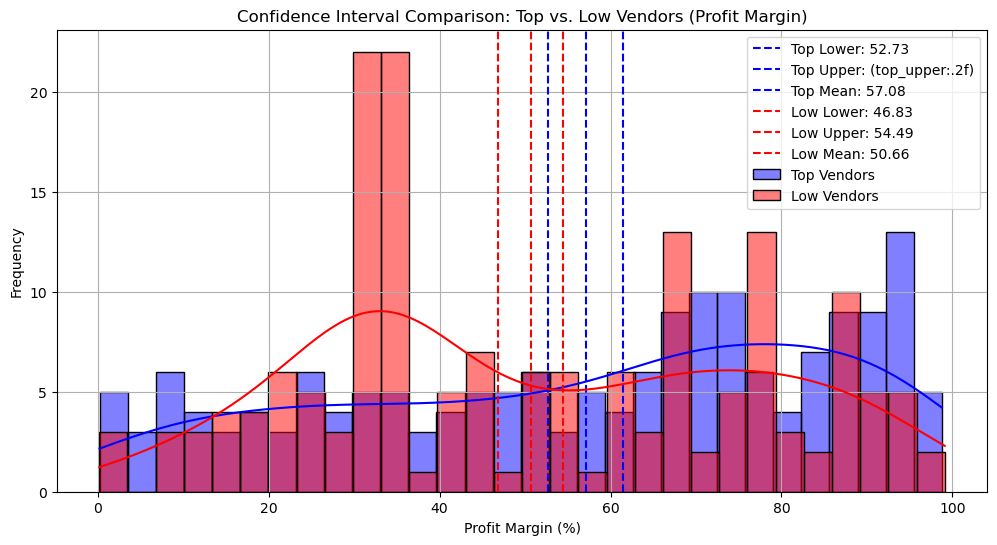

In [140]:
top_mean, top_lower, top_upper =  confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")

print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde= True, color="blue", bins= 30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: (top_upper:.2f)")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde= True, color="red", bins= 30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

##### Conclusion from above graph-----------

- The confidence interval for low-performing vendors (46.83% to 54.49%) is significantly lower than that of
  top-performing vendors (52.73% to 61.42%).

- This suggests that vendors with higher sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

- For low-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

